In [ ]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Preprocessing**

In [ ]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Define file paths
train = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/train'
test = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/test'
validation = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/val'

In [ ]:
# Define size and batch size
SIZE = 224
batch_size = 32

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45, 
    zoom_range = 0.2,
    shear_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
# Data Generator
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

Found 704 images belonging to 8 classes.
Found 88 images belonging to 8 classes.
Found 88 images belonging to 8 classes.


**Trained Model**

In [ ]:
# Input transfer learning model using Mobile Net
mobile = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

# Freeze the layer on model
for layer in mobile.layers:
  layer.trainable = False

#Add more layers on top of the base model
x = mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(8, activation = 'softmax')(x)

model = Model(inputs = mobile.input, outputs=x)

In [ ]:
# Training Process
model.compile(
    optimizer = 'Adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30,
    verbose = 2
)

Epoch 1/30
22/22 - 21s - loss: 1.5955 - accuracy: 0.4219 - val_loss: 0.8991 - val_accuracy: 0.7045 - 21s/epoch - 975ms/step
Epoch 2/30
22/22 - 17s - loss: 0.7922 - accuracy: 0.7230 - val_loss: 0.6582 - val_accuracy: 0.7614 - 17s/epoch - 760ms/step
Epoch 3/30
22/22 - 17s - loss: 0.5516 - accuracy: 0.8239 - val_loss: 0.5469 - val_accuracy: 0.8068 - 17s/epoch - 763ms/step
Epoch 4/30
22/22 - 18s - loss: 0.4381 - accuracy: 0.8509 - val_loss: 0.3999 - val_accuracy: 0.8182 - 18s/epoch - 807ms/step
Epoch 5/30
22/22 - 17s - loss: 0.3425 - accuracy: 0.8793 - val_loss: 0.4169 - val_accuracy: 0.8295 - 17s/epoch - 777ms/step
Epoch 6/30
22/22 - 17s - loss: 0.3901 - accuracy: 0.8594 - val_loss: 0.4273 - val_accuracy: 0.8523 - 17s/epoch - 771ms/step
Epoch 7/30
22/22 - 18s - loss: 0.3066 - accuracy: 0.8878 - val_loss: 0.3121 - val_accuracy: 0.9205 - 18s/epoch - 813ms/step
Epoch 8/30
22/22 - 17s - loss: 0.2868 - accuracy: 0.9020 - val_loss: 0.2441 - val_accuracy: 0.9091 - 17s/epoch - 762ms/step
Epoch 9/

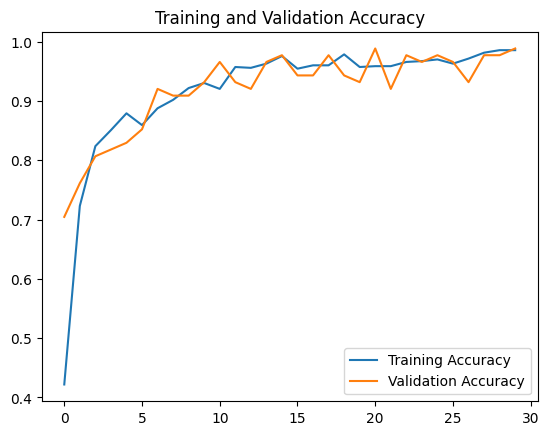

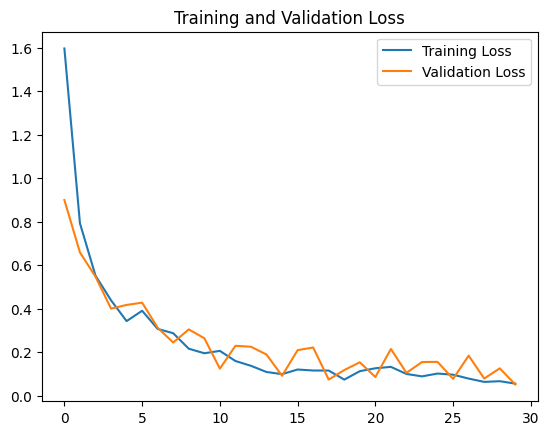

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define accuracy and loss values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
# Evaluate model on test data
model.evaluate(test_generator, verbose = 2)

3/3 - 2s - loss: 0.2863 - accuracy: 0.9545 - 2s/epoch - 549ms/step


[0.2863149344921112, 0.9545454382896423]

**Predict Image**

Saving humus.jpg to humus (4).jpg
1/1 [==============================] - 0s 416ms/step


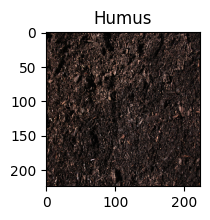

In [ ]:
# Import Libraries
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Predict Image
class_index = {v : k for k, v in train_generator.class_indices.items()}

uploaded = files.upload()

figure = plt.figure(figsize = (2, 2*len(uploaded)))

for i, image_test in enumerate(uploaded):
  img = load_img(image_test, target_size = (SIZE, SIZE))
  x = img_to_array(img)/255
  x = np.expand_dims(x, axis = 0)

  classes = model.predict(x, batch_size = batch_size)
  predicted_class = np.argmax(classes)
  predict = class_index[predicted_class]
  
  sub_x = figure.add_subplot(len(uploaded), 1, i+1)
  sub_x.imshow(img)
  sub_x.set_title(predict)

**Export Model**

In [ ]:
export_dir = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model_5'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model_5/soil_model.tflite')
tflite_model_file.write_bytes(tflite_model)

14017640